## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

### Semana 3 - Redes Neurais Artificiais

In [2]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV


print('Setup completo!')

Setup completo!


#### Aula 01 e 02 - Adaline e Regra Delta e Rede Perceptron

##### Perceptron

Vamos classificar as flores de acordo com a espécie apartir de um perceptro, mais especificamente por uma adaline

In [3]:
iris = datasets.load_iris()

In [4]:
# Setosa = 0 e Versicolor = 1 
X = iris['data'][:, (2, 3)][(iris['target']==0)|(iris['target']==1)]
y = iris['target'][(iris['target']==0)|(iris['target']==1)]

In [5]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred # Setosa = 0 e Versicolor = 1 

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

In [6]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0]/ per_clf.coef_[0][1]
b = -per_clf.intercept_/ per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


In [7]:
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

In [8]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

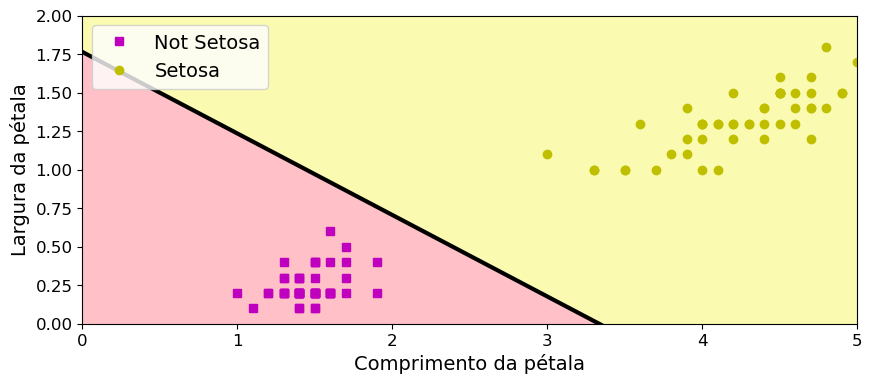

In [8]:
custom_cmap = ListedColormap(['#ffc0c8', '#fafab0'])

plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], 'ms', label='Not Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Setosa')
plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], 'k-', linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.axis(axes)

plt.show()

***

#### Aula 03 - Rede Perceptron Multicamadas (clf)



Nesse estudo em questão a base de dados utilizas são de peças de vestuário e esse é um problema multi-classe. A resposta que esperamos é binária (0 ou 1)

In [9]:
# carregando o conjunto

fashion = keras.datasets.fashion_mnist

In [10]:
# divisão dos dados de treino e de teste
(X_trainf, y_trainf), (X_test, y_test) = fashion.load_data()
X_trainf.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
# inteiro de 8 bytes positivo
X_trainf.dtype

dtype('uint8')

In [13]:
type(X_trainf)

numpy.ndarray

##### Separação dos dados para validação que ocorrerá ao longo do treinamento

In [14]:
# o valor de cada pixel pode variar. 
# No nosso caso essa variação é de 255
X_test[0].max(), X_test[0].min()

(255, 0)

In [15]:
# buscando que não haja diferenciação entre os pixels por conta
# dos seus valores optou-se normalizar-los em relação ao valor
# maximo
X_valid, X_train = X_trainf[:5000]/255.,X_trainf[5000:]/255.
y_valid, y_train = y_trainf[:5000],y_trainf[5000:]
X_test = X_test/255.

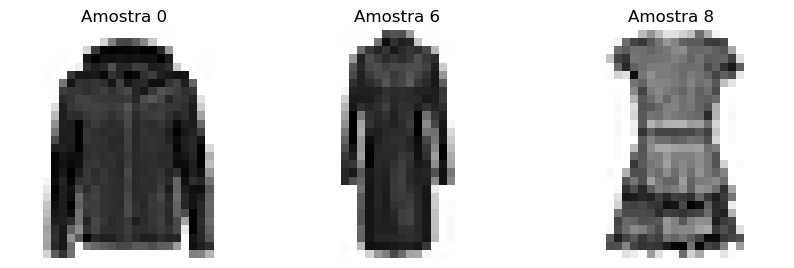

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(X_train[0], cmap='binary')
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[6], cmap='binary')
plt.title('Amostra 6')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[8], cmap='binary')
plt.title('Amostra 8')
plt.axis('off')

plt.show()

In [17]:
# cada classe é representado por um número
print(y_train)
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

[4 0 7 ... 3 0 5]


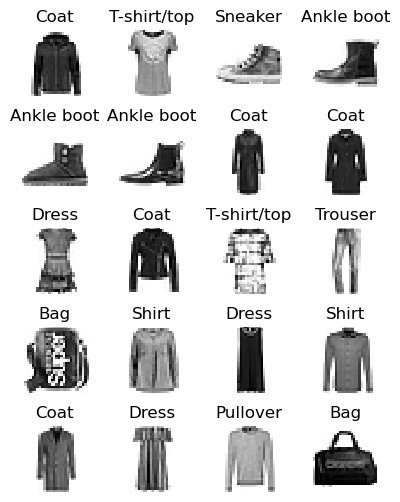

In [18]:
n_rows = 5
n_cols = 4
plt.figure(figsize= (n_cols * 1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Criando o modelo PMC 
MultiCamadas Perceptron

In [19]:
# Relu = rectified linear unit (função rampa)
# como temos 10 classes no nosso problema [0-9] devemos usar 10 neuronios na ultima camada

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28])) # achata a matriz à um vetor (1,28*28)
# model.add(keras.layers.Dense(300, activation='relu')) # primeira camada com 300 neuronios
# model.add(keras.layers.Dense(100, activation='relu')) # segunda camanada com 100 neuronios
# model.add(keras.layers.Dense(10,activation='softmax')) # cada de saida 10 neuronios e ativacao multiclasse

In [20]:
# criando o modelo mais diretamente

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [21]:
# Verificando a estrutura do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# verificando as camadas do modelo
model.layers

In [23]:
hidden1 = model.layers[1]

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05446962,  0.01469565,  0.071584  , ..., -0.05933239,
         0.01174113, -0.00547294],
       [-0.06018858, -0.06986733,  0.04902017, ...,  0.01258737,
         0.04554373, -0.00967272],
       [ 0.01754651,  0.06985661, -0.05032618, ...,  0.0104698 ,
        -0.01046633,  0.02506205],
       ...,
       [ 0.04056422,  0.05222973, -0.00138947, ..., -0.05471528,
        -0.04351606, -0.03786179],
       [-0.0686856 ,  0.06657571,  0.03275064, ..., -0.00323863,
         0.06783998, -0.03300053],
       [ 0.02687053, -0.01139847,  0.01887716, ...,  0.0691739 ,
         0.05684189, -0.00313974]], dtype=float32)

In [25]:
weights.shape, biases.shape

((784, 300), (300,))

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

##### Treinando o modelo PMC 
MultiCamadas Perceptron

In [10]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(
                        X_valid, 
                        y_valid
                        )
                    )

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
list(y_test[:3])

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

In [ ]:
n_rows = 1
n_cols = 3
plt.figure(figsize= (n_cols * 3, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]] +'/'+ class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***

#### Aula 04 - Redes Percetron Multicamadas (regressão)

In [ ]:
housing = fetch_california_housing()

In [ ]:
# Dividindo os dados de treino e de teste
X_trainf, X_test, y_trainf, y_test = train_test_split(
    housing.data, 
    housing.target
    )
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainf, y_trainf
)

In [ ]:
# Processo de padronização 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Utilizaremos a API sequencial para construir, treinar, avaliar e usar a PMC de regressão,
# assim como fizemos na PMC de classificação. A diferença é que na camada de saída haverá apenas um neurônio, referente à variável do preço estimado.

model = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_tst = model.evaluate(X_test, y_test)

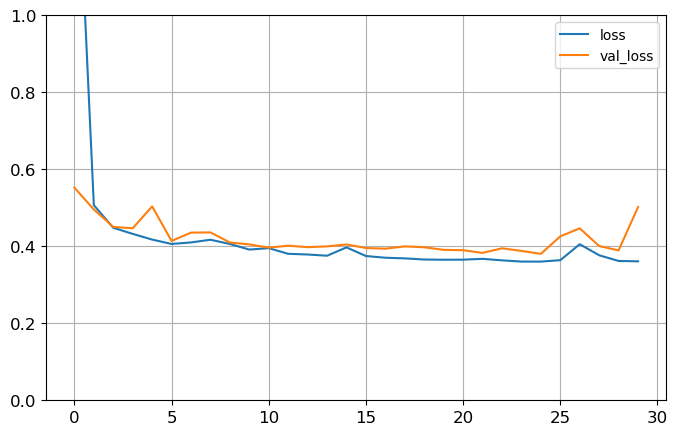

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

162/162 [==============================] - 0s 2ms/step


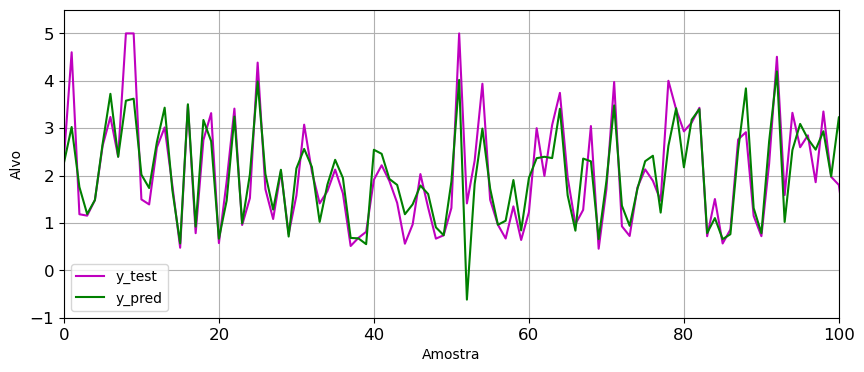

In [ ]:
# estimando o valor da amostras que não foram apresentadas no treinamento
y_pred = model.predict(X_test)

plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(range(0, len(y_test)), y_test, 'm', label='y_test')
plt.plot(range(0, len(y_pred)), y_pred, 'g', label='y_pred')
plt.axis([0, 100, -1, 5.5])
plt.xlabel('Amostra')
plt.ylabel('Alvo')
plt.legend()

plt.show()

##### Busca por melhores parâmetros para uma rede PMC

In [ ]:
# função para representar o modelo
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential([])
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\ninam\AppData\Local\Temp\ipykernel_19864\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
keras_reg.fit(X_train,
              y_train,
              epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)]
              )

In [ ]:
mse_test = keras_reg.score(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3934


In [ ]:
X_novo = X_test[:10]
y_pred = keras_reg.predict(X_novo)
y_pred

1/1 [==============================] - 0s 61ms/step


array([2.212042 , 3.0506253, 1.847549 , 1.3268805, 1.436985 , 2.6207623,
       3.7924   , 2.415086 , 3.7406168, 3.4255486], dtype=float32)

##### Definir hiperparametros a fim de encontrar a melhor configuração da rede PMC 

In [ ]:
params_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train,
                  y_train,
                   epochs=100,
                   callbacks = [keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# melhores hiperparametros
rnd_search_cv.cv_results_

{'mean_fit_time': array([39.47307889, 64.8104047 , 65.52965697, 56.45144701, 75.09666101,
        81.41683547, 72.71693834, 78.99783333, 61.78637568, 87.00894817]),
 'std_fit_time': array([1.6150858 , 5.53392391, 1.71432046, 2.62226888, 2.27449112,
        0.52477775, 1.44311898, 2.41507562, 4.99009292, 4.40617918]),
 'mean_score_time': array([0.41885098, 0.57459219, 0.57401252, 0.53899749, 0.68041921,
        0.79053601, 0.71730113, 0.69181736, 0.48602311, 0.76031415]),
 'std_score_time': array([0.06296651, 0.03039032, 0.01098641, 0.26235825, 0.01730912,
        0.15513844, 0.14821104, 0.0412206 , 0.07516057, 0.03228044]),
 'param_learning_rate': masked_array(data=[0.002855531313769341, 0.007822427953945353,
                    0.000369098221371052, 0.0038729622142289017,
                    0.0004857287063410244, 0.005112465293494545,
                    0.015654845379862087, 0.004072776017364689,
                    0.001894672910388839, 0.0063581714118965136],
              mask=[F

In [ ]:
rnd_search_cv.best_score_, rnd_search_cv.best_params_

(-0.3027193049589793,
 {'learning_rate': 0.005112465293494545, 'n_hidden': 3, 'n_neurons': 70})

162/162 [==============================] - 0s 2ms/step


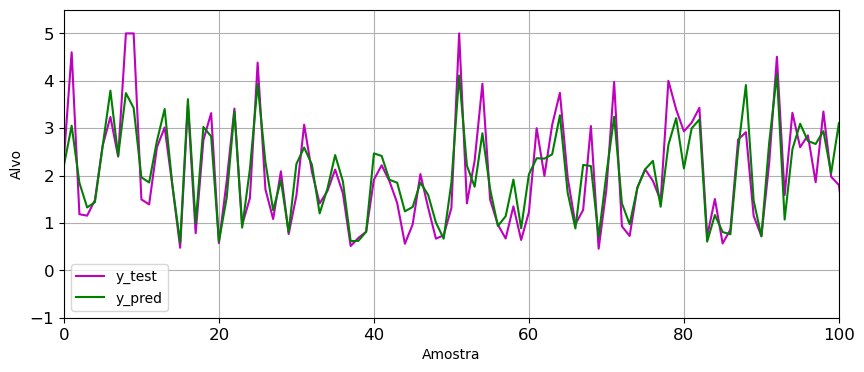

In [ ]:
# estimando o valor da amostras com os melhores params
y_pred = keras_reg.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0, len(y_test)), y_test, 'm', label='y_test')
plt.plot(range(0, len(y_pred)), y_pred, 'g', label='y_pred')
plt.axis([0, 100, -1, 5.5])
plt.xlabel('Amostra')
plt.ylabel('Alvo')
plt.legend()

plt.show()

##### Estrutura do modelo (save and load)

In [ ]:
model = rnd_search_cv.best_estimator_.model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model_loaded = keras.models.load_model("my_keras_model.h5")

plot_model(model_loaded, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


##### Função ajustar os hiperparâmetros do problema de classificação multiclasse

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) #camada de achatamento da matriz 28x28 da imagem
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax")) #camada de saida com 10 saidas e funcao softmax (calcula probabilidade da classe)

  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=["accuracy"])
  model.summary()
  return model